<a href="https://colab.research.google.com/github/rayxuan2000/Time-Series-Forecasting-with-Yahoo-Stock-Price/blob/main/Time_Series_Forecasting_with_New_York_Cab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Import Data

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Navigate to the folder
%cd /content/drive/My Drive/resume_project/Time_series

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/resume_project/Time_series


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

plt.style.use('bmh')

As for taxi data dictionary, check this link: https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

In [ ]:
df_taxi = pd.read_csv('taxi.csv')

# Part 1 taxi time series analysis

# 2.EDA

## Genaral analysis

In [ ]:
df_taxi.head()

,year_month_day,count
0,2010-02-01,201916
1,2010-02-02,220006
2,2010-02-03,224521
3,2010-02-04,235707
4,2010-02-05,243352


In [ ]:
df_taxi.describe()

,count
count,5142.000000
mean,302853.988720
std,163793.848363
min,4229.000000
25%,122821.250000
50%,322810.000000
75%,450212.750000
max,849414.000000


In [ ]:
df_taxi.isnull().sum()

year_month_day    0
count             0
dtype: int64

In [ ]:
df_taxi['Date'] = pd.to_datetime(df_taxi['year_month_day'])
df_taxi.set_index('Date', inplace=True)
df_taxi.head()

,year_month_day,count
Date,,
2010-02-01,2010-02-01,201916
2010-02-02,2010-02-02,220006
2010-02-03,2010-02-03,224521
2010-02-04,2010-02-04,235707
2010-02-05,2010-02-05,243352


## Visualization

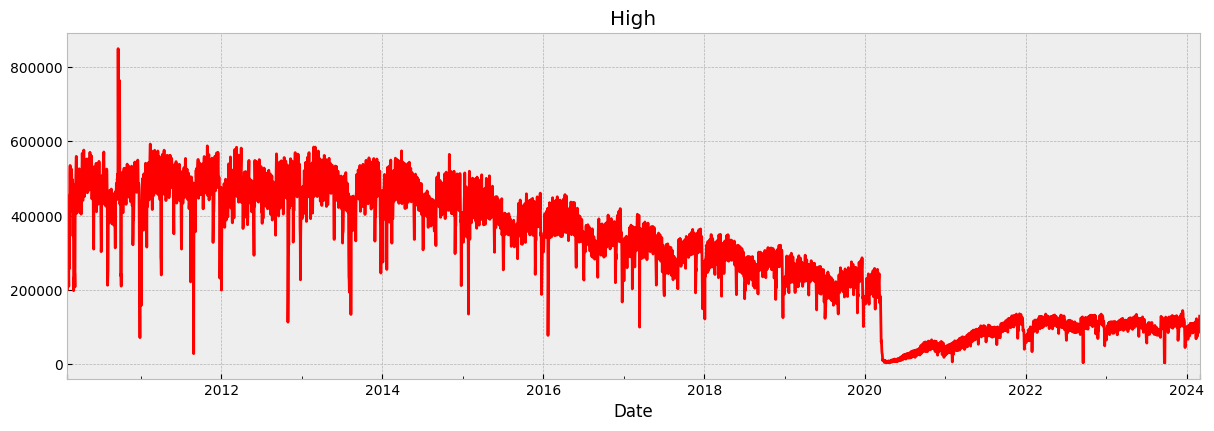

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.45)

df_taxi['count'].plot(ax=ax, color='r')
ax.set_title('High')

plt.show()


## Analysis of varying rate

We can compare adjacent data points and calculate its varying rate.

In [ ]:
df_taxi['div'] = df_taxi['count'].div(df_taxi['count'].shift())
df_taxi['pct'] = df_taxi['div'].sub(1).mul(100)
# df.fillna(0,inplace=True)
df_taxi.tail()

,year_month_day,count,div,pct
Date,,,,
2024-02-25,2024-02-25,95826,0.813249,-18.675052
2024-02-26,2024-02-26,86321,0.900810,-9.919020
2024-02-27,2024-02-27,118614,1.374104,37.410364
2024-02-28,2024-02-28,112463,0.948143,-5.185728
2024-02-29,2024-02-29,129890,1.154958,15.495763


Since the time series data is too long, we can only check a part of the data.

Text(0.5, 1.0, 'Percentage Change')

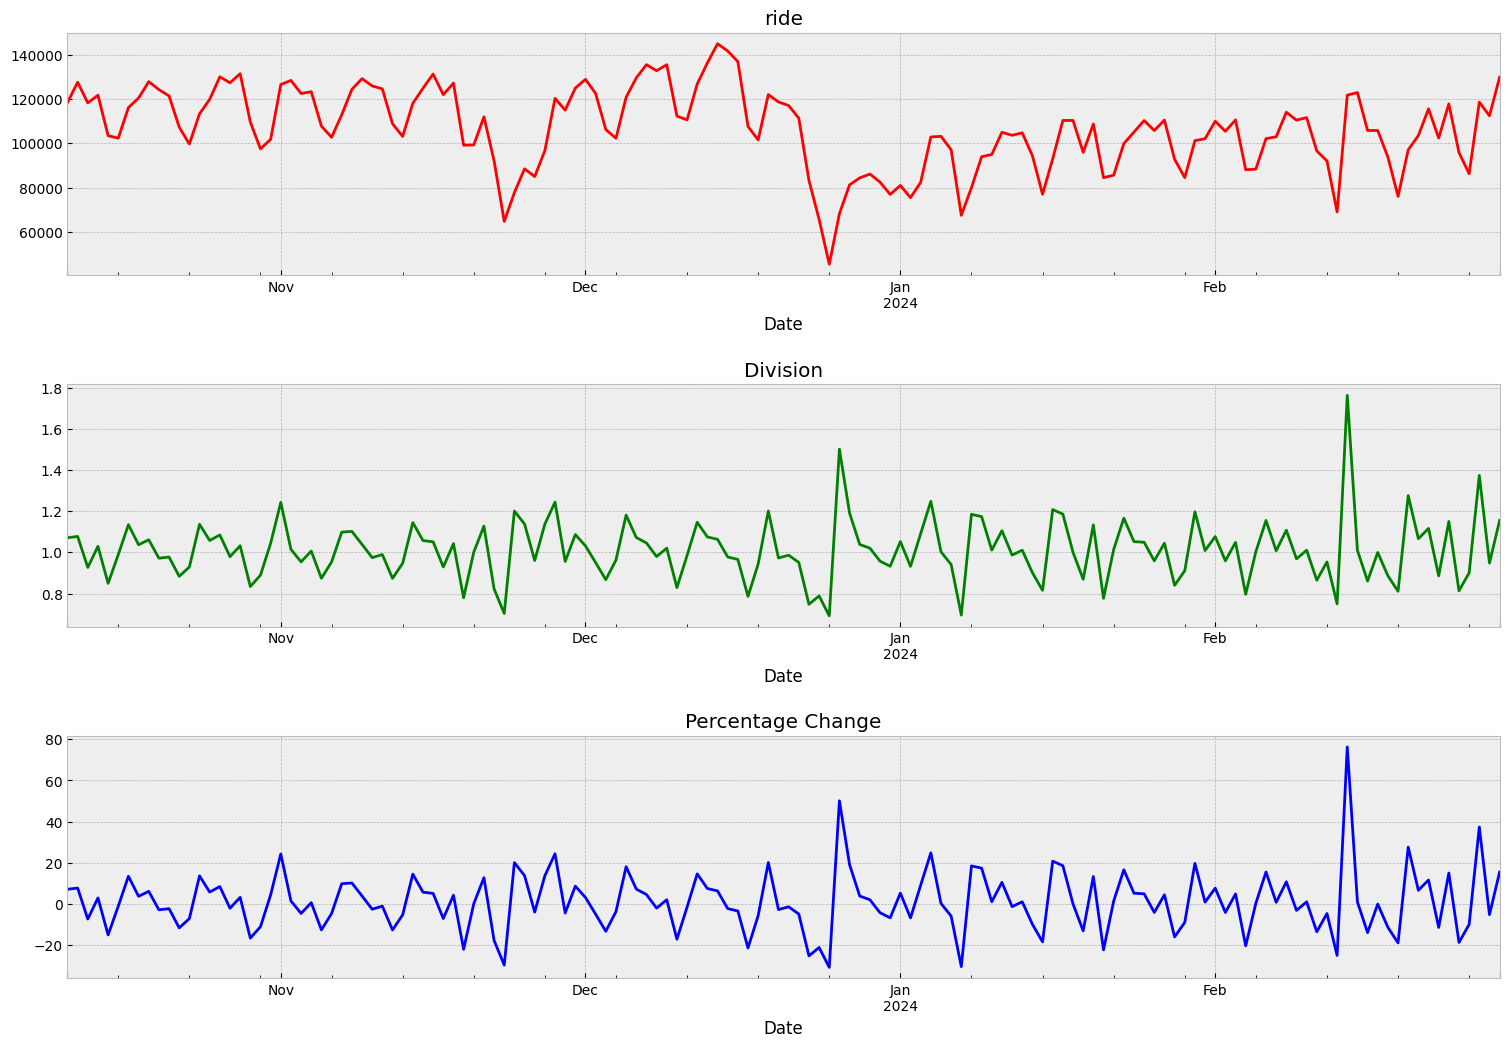

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(15, 10))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    wspace=None, hspace=0.45)
df_taxi['count'].iloc[5000:].plot(ax=axes[0],color='r'); axes[0].set_title('ride')
df_taxi['div'].iloc[5000:].plot(ax=axes[1],color='g'); axes[1].set_title('Division')
df_taxi['pct'].iloc[5000:].plot(ax=axes[2],color='b'); axes[2].set_title('Percentage Change')
# axes[2].set_ylim(-10, 10)

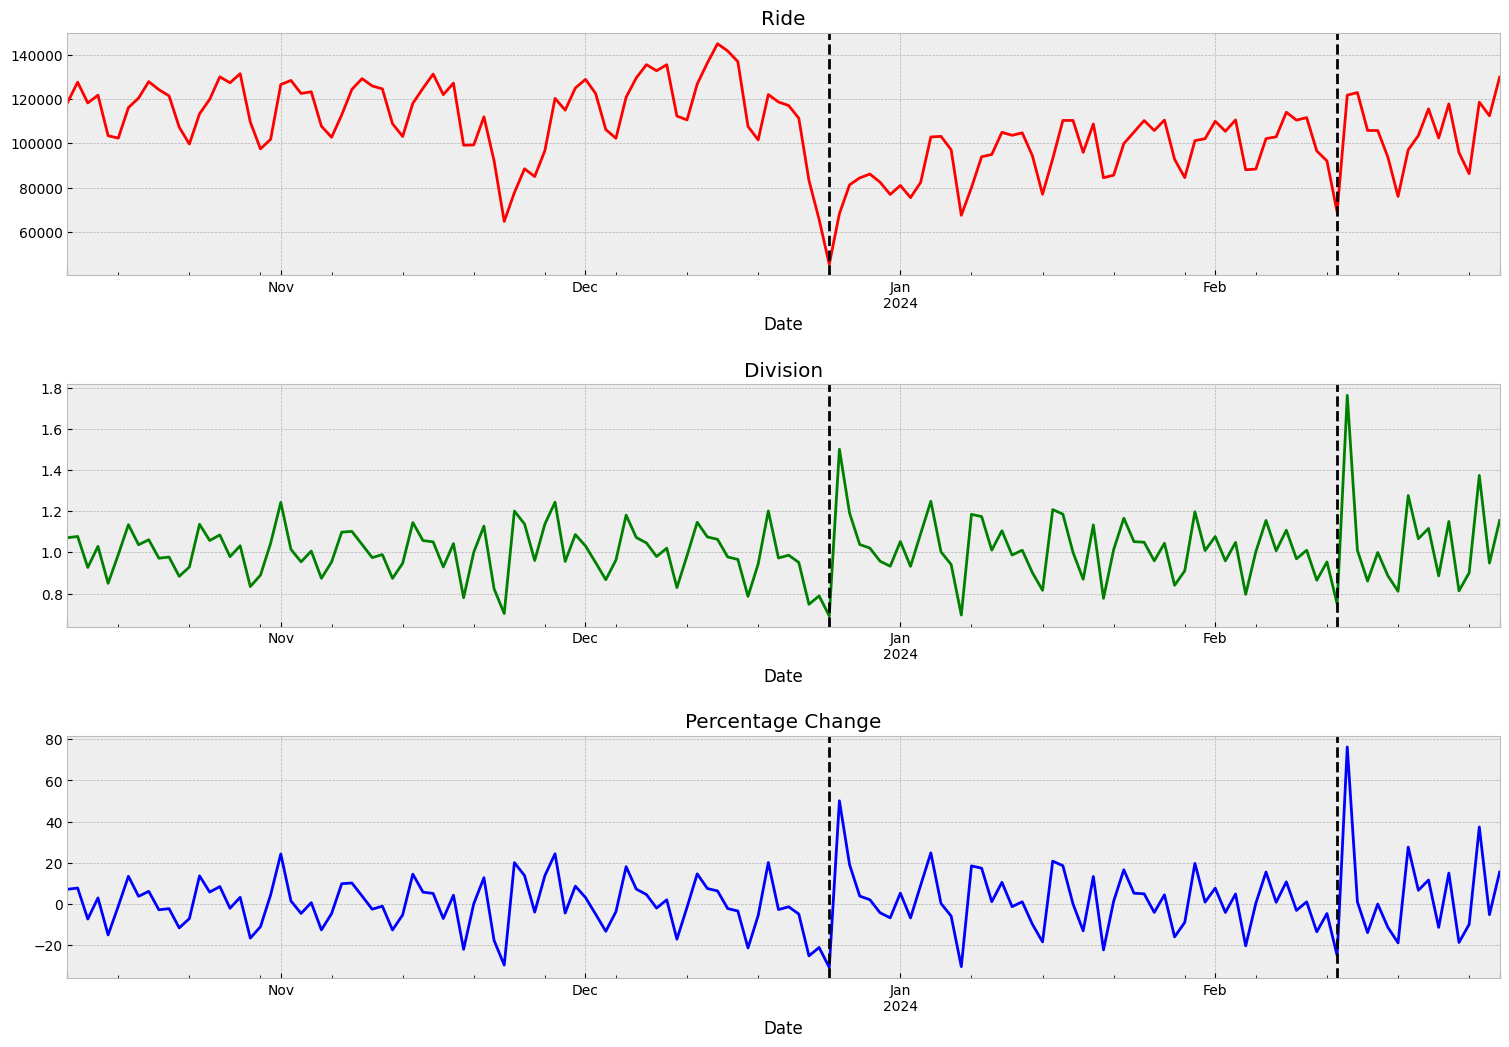

In [ ]:
import matplotlib.pyplot as plt

# Example reference positions
reference_positions = ['2023-12-25','2024-02-13']  # Add as many positions as you need

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.45)

df_taxi['count'].iloc[5000:].plot(ax=axes[0], color='r')
axes[0].set_title('Ride')
df_taxi['div'].iloc[5000:].plot(ax=axes[1], color='g')
axes[1].set_title('Division')
df_taxi['pct'].iloc[5000:].plot(ax=axes[2], color='b')
axes[2].set_title('Percentage Change')

# Add vertical reference lines at the specified x-positions across all three subplots
for x_position in reference_positions:
    for ax in axes:
        ax.axvline(x=x_position, color='k', linestyle='--')

plt.show()


## Statistic analysis

## rolling mean

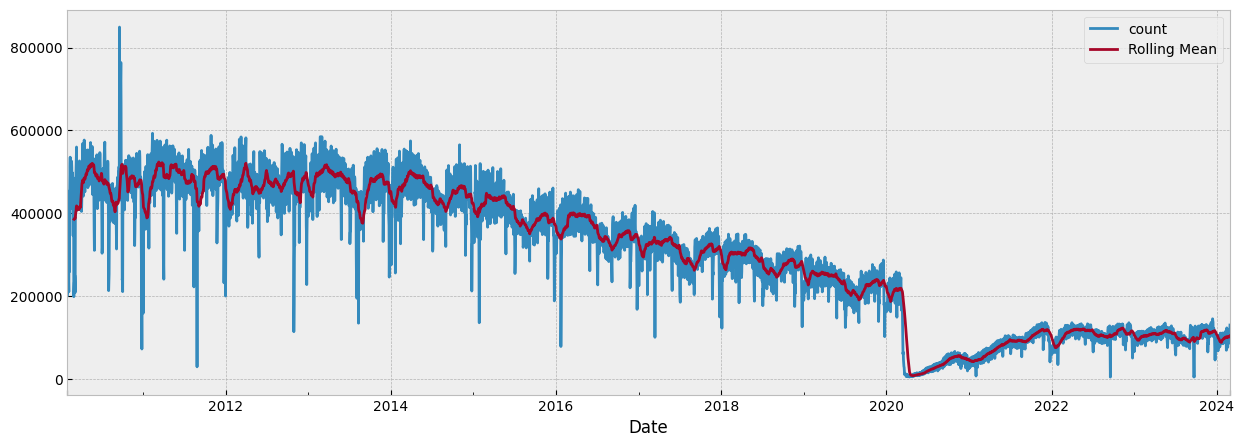

In [ ]:
plt.figure(figsize=(15,5))
rolling = df_taxi['count'].rolling(30).mean()
df_taxi['count'].plot()
rolling.plot()
plt.legend(['count','Rolling Mean'])

## cumulative mean

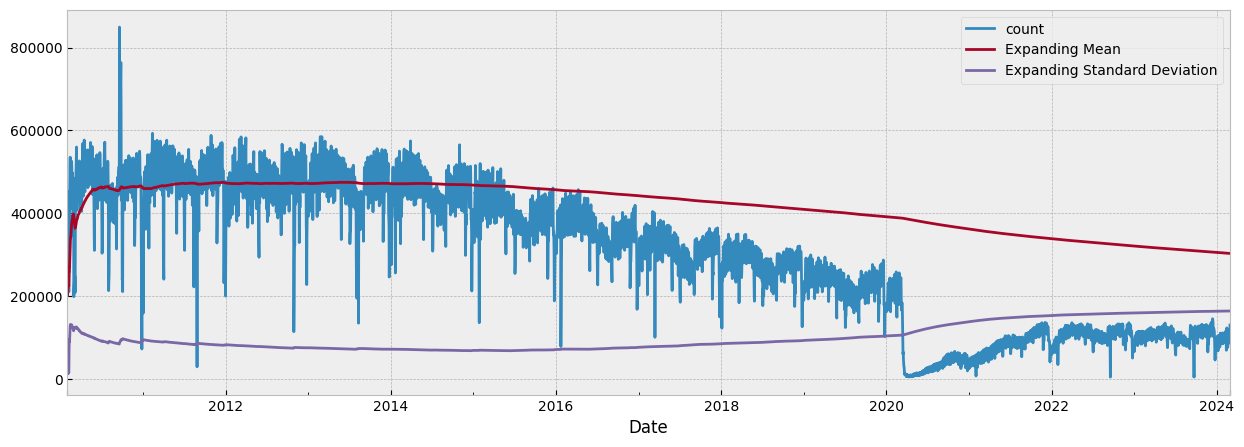

In [ ]:
taxi_mean = df_taxi['count'].expanding().mean()
taxi_std = df_taxi['count'].expanding().std()
plt.figure(figsize=(15,5))
df_taxi['count'].plot()
taxi_mean.plot()
taxi_std.plot()
plt.legend(['count','Expanding Mean','Expanding Standard Deviation'])

## Resampling

In [ ]:
df_clean=df_taxi[['count']]
df_clean.head(10)

,count
Date,
2010-02-01,201916
2010-02-02,220006
2010-02-03,224521
2010-02-04,235707
2010-02-05,243352
2010-02-06,234441
2010-02-07,210153
2010-02-08,419895
2010-02-09,453579


<Axes: xlabel='Date'>

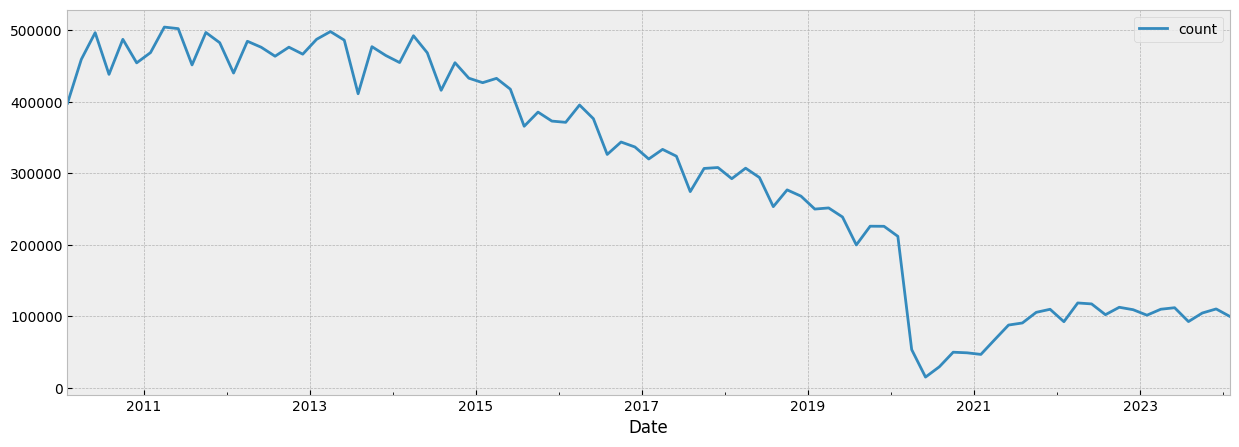

In [ ]:
y = df_clean.resample('2M').mean()
y.plot(figsize=(15, 5))

Here briefly recall the definition of ACF and PACF.

Now we'd like to predict future based on now and past.

- ACF: includes all the lags or intervals between t and t-k time period; actually is self correlation coefficient.

- PACF: doesn't take into account all the time lags between t and t-k; https://timeseriesreasoning.com/contents/partial-auto-correlation/

![](https://i0.wp.com/timeseriesreasoning.com/wp-content/uploads/2021/05/2bc6f-1kdddkan3ktnvjenodtsrca.png?w=1158)



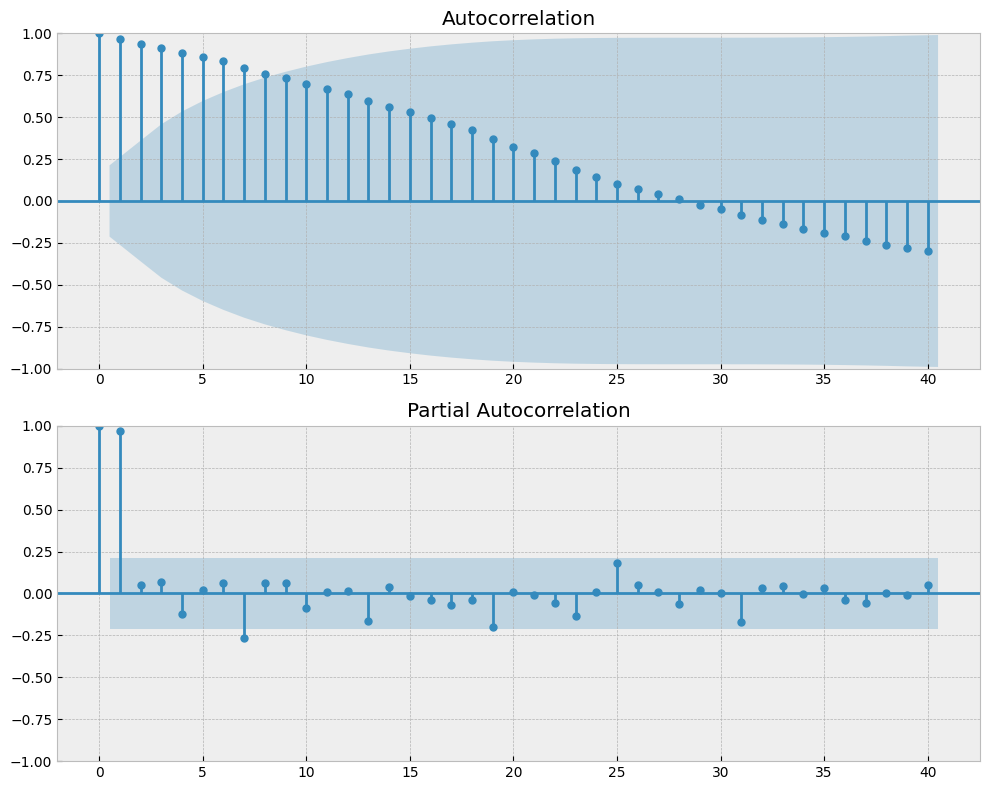

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y, lags=40,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()



Blue bands are confidence intervals. If you observe a blue band on these plots, it means that the autocorrelation coefficients lying within this band are not statistically significant at the chosen confidence level. In other words, if the bars representing autocorrelation coefficients extend outside this band, it suggests that those particular lags have statistically significant autocorrelation.

# 3.Decomposition

There are different decomposition mode 'mul' or 'add' we can try.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(df, column_name):
    ##
    # The results are obtained by first estimating the trend by applying a convolution
    # filter to the data. The trend is then removed from the series and the average
    # of this de-trended series for each period is the returned seasonal component.

    result_mul = seasonal_decompose(df[column_name], model='multiplicative', extrapolate_trend = 'freq',period=10)

    ##
    # period: This parameter sets the length of the seasonal cycle. In this case,
    # it specifies that the seasonal period is period time units (e.g., period days if
    # the data is daily). This means the function will look for repeating patterns
    # every period time units.
    # result_add = seasonal_decompose(df[column_name], model = 'additive', extrapolate_trend='freq', period=150)

    plt.rcParams.update({'figure.figsize': (10,8)})
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
    # result_mul.plot().suptitle('Multiplicative Decompose', fontsize=30)
    result_mul.plot()
    # suptitle('Additive Decompose', fontsize=10)

    plt.show()

    return result_mul

<Figure size 1000x800 with 0 Axes>

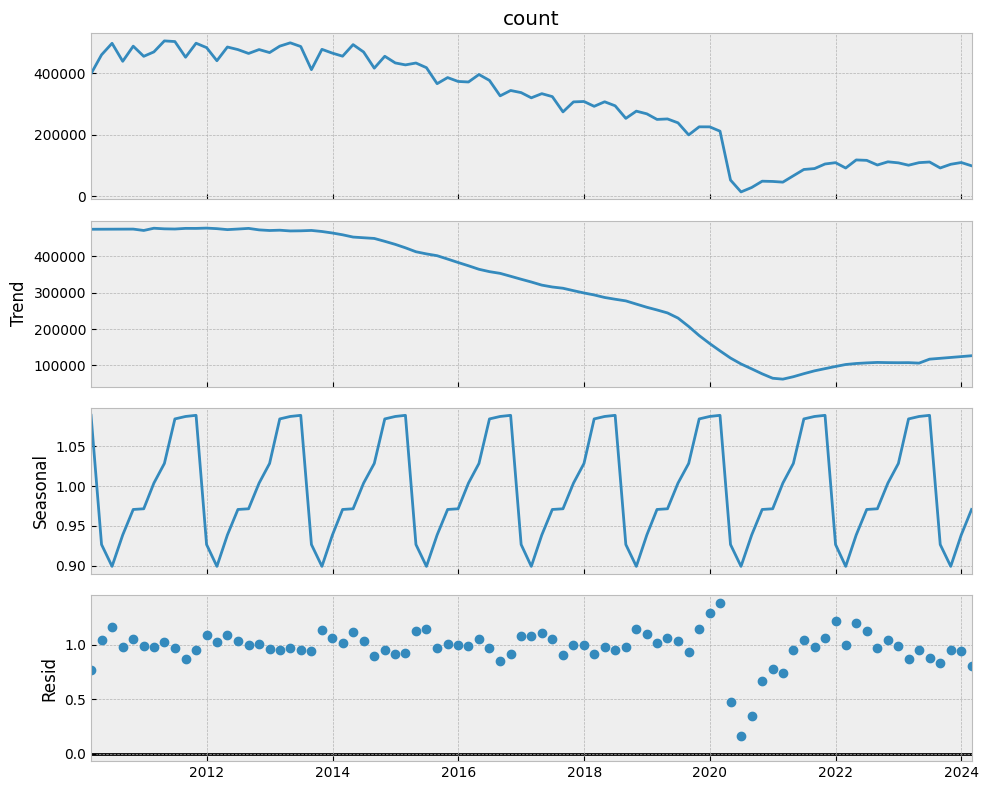

In [ ]:
result_mul = decompose(y, 'count')

# 4.Stationary or not

## ADF Validation

Although some advanced models don't require time series data to have stationary property (eg. built-in mechanisms to handle non-stationary data through differencing), we'd better check this before applying some non-advanced model. One of the most common way of doing this is ADF test.

In [ ]:
result_mul.observed

Date
2010-02-28    398050.321429
2010-04-30    459497.573770
2010-06-30    496827.524590
2010-08-31    438462.838710
2010-10-31    487537.967213
                  ...      
2023-06-30    111817.737705
2023-08-31     92439.790323
2023-10-31    104409.983607
2023-12-31    110102.590164
2024-02-29     99535.516667
Freq: 2M, Name: count, Length: 85, dtype: float64

In [ ]:

from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(result_mul.observed)

# Extract and print the test statistic and p-value
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'    {key}: {value}')

# Interpretation
if p_value > 0.05:
    print("Fail to reject the null hypothesis (H0): The series is non-stationary.")
else:
    print("Reject the null hypothesis (H0): The series is stationary.")

ADF Statistic: -0.8810226143508457
p-value: 0.7941576887503625
Critical Values:
    1%: -3.517113604831504
    5%: -2.8993754262546574
    10%: -2.5869547797501644
Fail to reject the null hypothesis (H0): The series is non-stationary.


## differencing

ADF Statistic (Differenced): -3.3852092640318743
p-value (Differenced): 0.011473540158682323


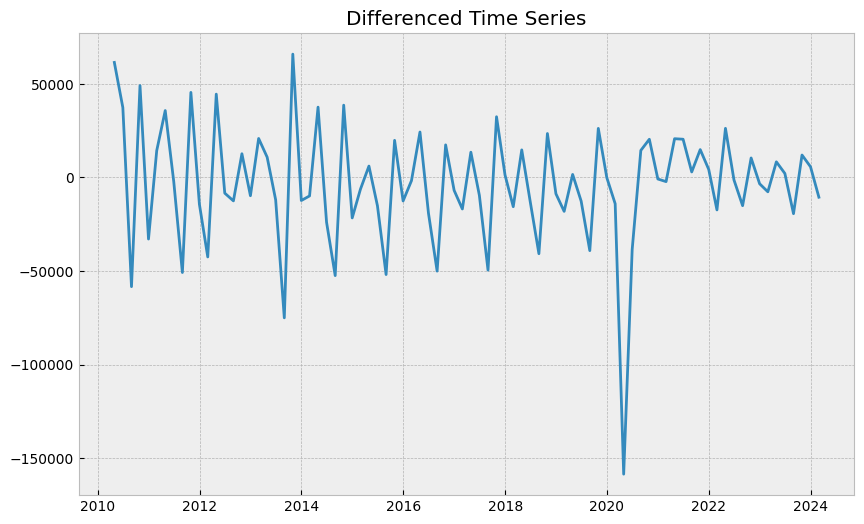

The differenced series is stationary.


In [ ]:
time_series_diff = result_mul.observed.diff().dropna()
# time_series_diff = np.log(result_mul.observed).diff().dropna()

# Perform the ADF test on the differenced series
result_diff = adfuller(time_series_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(time_series_diff)
plt.title('Differenced Time Series')
plt.show()

if result_diff[1] > 0.05:
    print("The differenced series is still non-stationary. Consider additional differencing or other transformations.")
else:
    print("The differenced series is stationary.")

# 5.Modeling

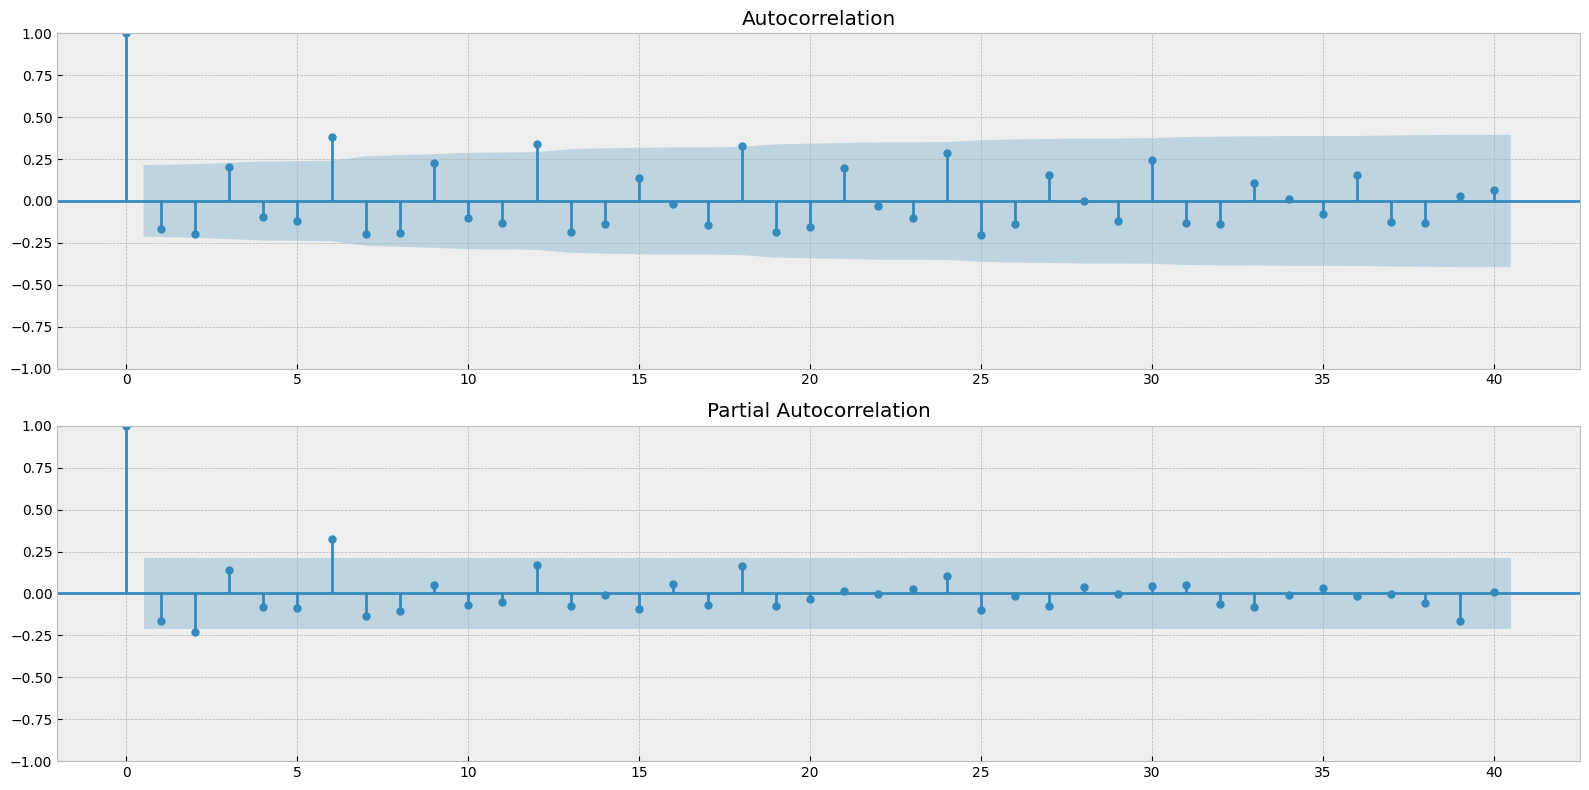

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(16,8))


ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(time_series_diff, lags=40,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(time_series_diff, lags=40, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()

Be aware of overdifferenced!!! https://people.duke.edu/~rnau/411arim2.htm need more differencing or overdifferenced?

Before modeling, we need to find some critical points above to determine parameters in the models. ACF tails off and PACF cuts off at 6. So we can predict that AR will do better than MA. Next we will verify that. As for the criteria, I will use AIC to compare.

## AR

Autoregressive process of order p, an AR model assumes that the current value of a time series is a **linear combination of its past values**. _Appropriate when ACF tails off and PACF cuts off at lag p_.

AIC of the fitted AR model: 1828.3427313658785


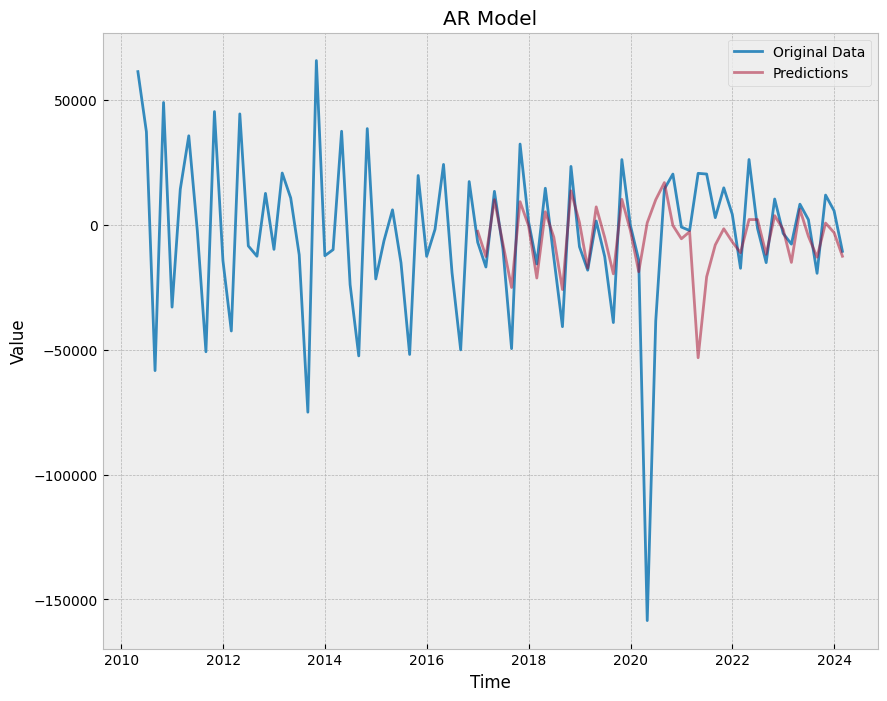

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Fit AR model
lag = 6  # You may adjust the lag value based on your data characteristics
model = AutoReg(time_series_diff, lags=lag)
model_fit = model.fit()

# Calculate and print AIC
aic = model_fit.aic
print("AIC of the fitted AR model:", aic)

# Define the index from where you want to start making predictions
start_index = 40  # Adjust this index based on your requirement

# Predictions
predictions = model_fit.predict(start=start_index, end=len(time_series_diff)-1)

# Plot data and predictions
plt.plot(time_series_diff.index, time_series_diff.values, label='Original Data')
plt.plot(time_series_diff.index[start_index:], predictions, label='Predictions', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('AR Model')
plt.legend()
plt.show()

## MA

Moving-average process with order q, an MA model assumes that the current value of a time series is a **linear combination of past error terms**. _Appropriate when ACF cuts off at lag q and PACF tails off_.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC of the fitted AR model: 2098.685628852406


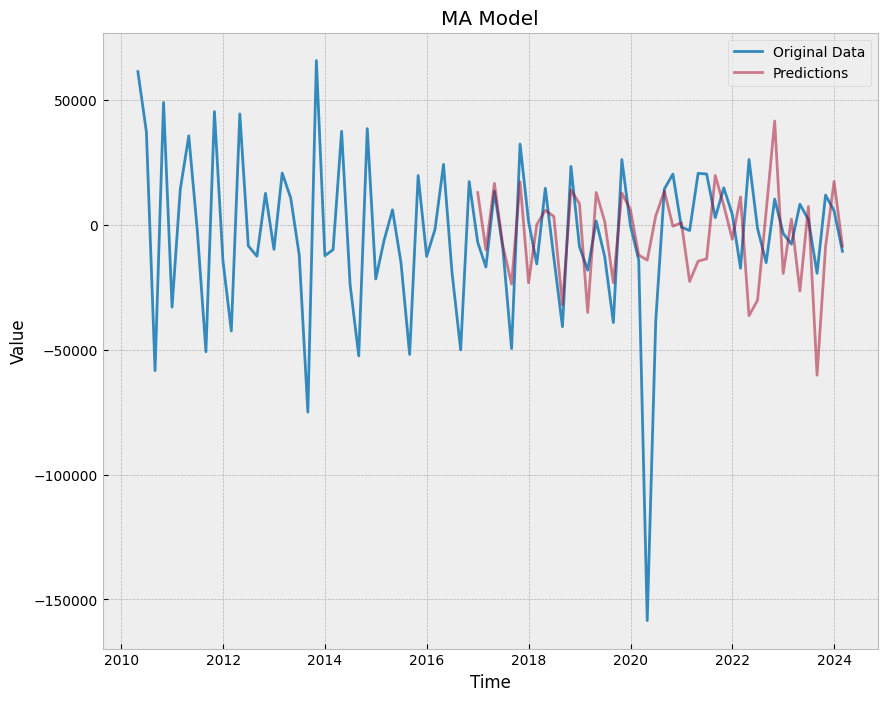

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit MA model
q = 18  # You may adjust the order of the MA model based on your data characteristics
model = ARIMA(time_series_diff, order=(0, 0, q))
model_fit = model.fit()

# Define the index from where you want to start making predictions
start_index = 40  # Adjust this index based on your requirement

# Predictions
predictions = model_fit.predict(start=start_index, end=len(time_series_diff)-1, typ='levels')

# Get testing data
test_data = time_series_diff.iloc[start_index:]

# Calculate and print AIC
aic = model_fit.aic
print("AIC of the fitted AR model:", aic)

# Plot data and predictions
plt.plot(time_series_diff.index, time_series_diff.values, label='Original Data')
plt.plot(time_series_diff.index[start_index:], predictions, label='Predictions',alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('MA Model')
plt.legend()
plt.show()

## ARMA

If both ACF and PACF tails off.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC of the fitted AR model: 2041.9382465323438


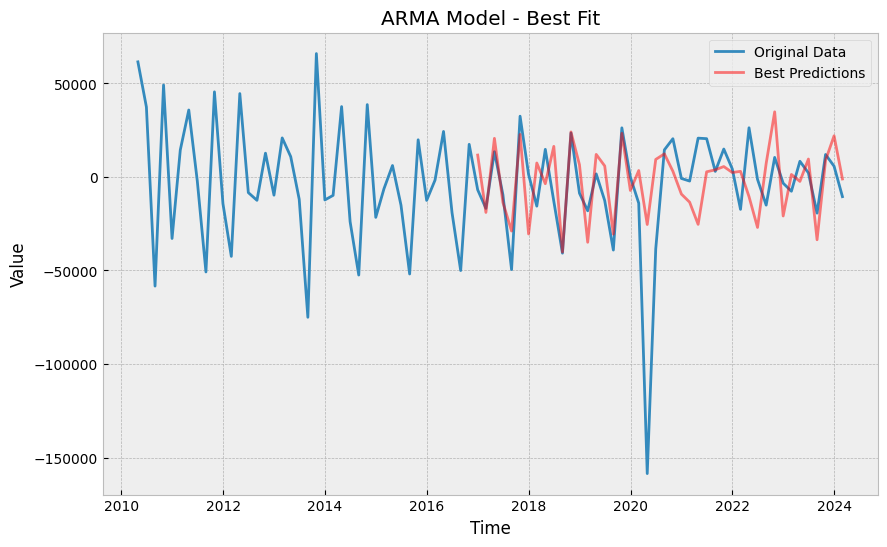

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt


# Define the index from where you want to start making predictions
start_index = 40  # Adjust this index based on your requirement


# Fit the best model
best_model = ARIMA(time_series_diff, order=(6, 0, 18))
best_model_fit = best_model.fit()

# Predictions using the best model
best_predictions = best_model_fit.predict(start=start_index, end=len(time_series_diff)-1, typ='levels')

# # Get testing data
# test_data = time_series_diff.iloc[start_index:]

# Calculate and print AIC
aic = best_model_fit.aic
print("AIC of the fitted AR model:", aic)

# Plot data and predictions
plt.figure(figsize=(10, 6))
plt.plot(time_series_diff.index, time_series_diff.values, label='Original Data')
plt.plot(time_series_diff.index[start_index:], best_predictions, label='Best Predictions', color='red',alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARMA Model - Best Fit')
plt.legend()
plt.show()


## ARIMA

In [ ]:
model = ARIMA(y, order=(18,1,6))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                   85
Model:                ARIMA(18, 1, 6)   Log Likelihood                -978.432
Date:                Thu, 23 May 2024   AIC                           2006.863
Time:                        02:13:11   BIC                           2067.634
Sample:                    02-28-2010   HQIC                          2031.293
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1420      0.516     -0.275      0.783      -1.153       0.869
ar.L2         -0.2302      0.577     -0.399      0.690      -1.360       0.900
ar.L3         -0.2875      0.603     -0.476      0.6

ARIMA(d,p,q)

In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pm

model = pm.auto_arima(y, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=15, max_q=15, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1990.176, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1986.034, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1987.791, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1988.323, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1985.058, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.374 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -991.529
Date:                Thu, 23 May 2024   AIC                           1985.058
Time:                        02:13:22   BIC                           1987.489
Sample:                    02-28-2010   HQIC                          1986.036
                         - 02-29-2024                                       

**The ideal model should have residuals that are uncorrelated white Gaussian noise centered on zero**. We can use the results object’s .plot_diagnostics method to generate four common plots for evaluating this.

https://towardsai.net/p/l/time-series-forecasting-with-arima-models-in-python-part-2

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


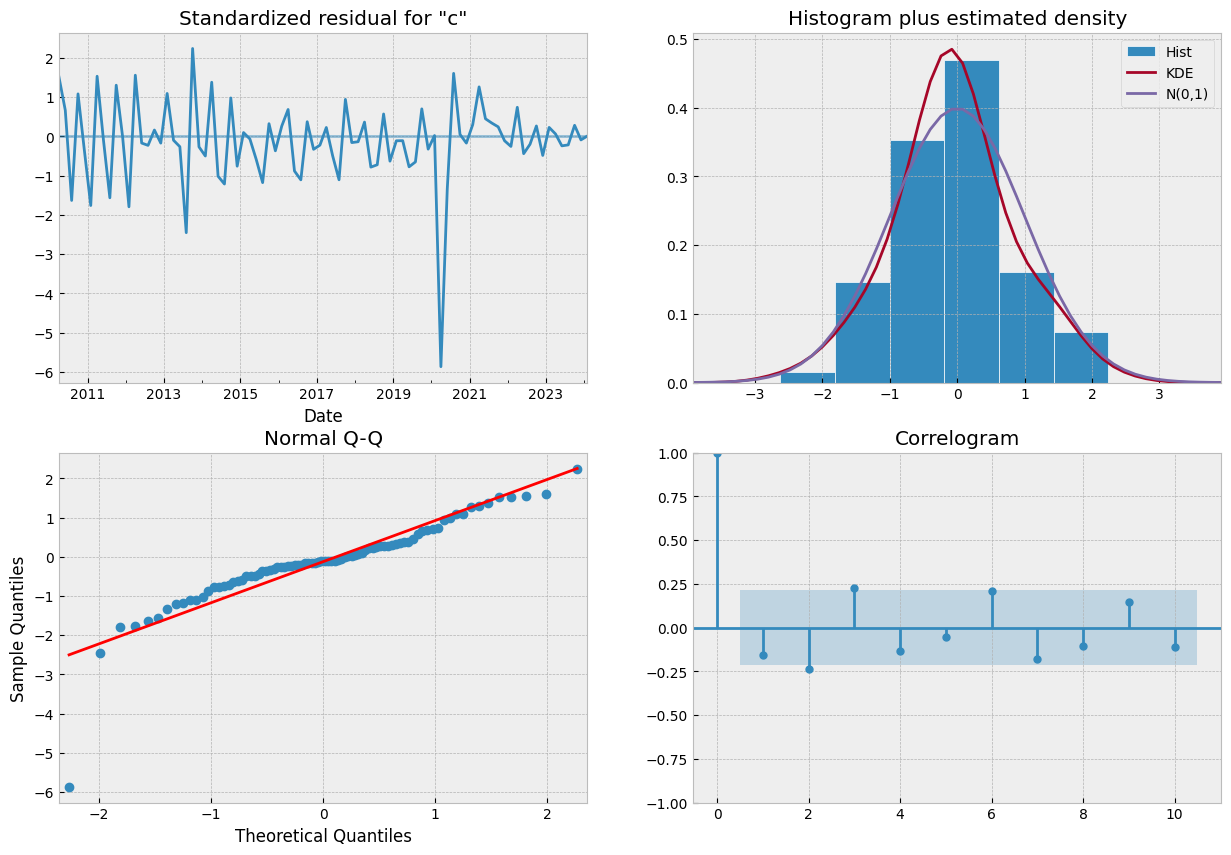

In [ ]:
# (p,d,q)
import statsmodels.api as sm
# mod = sm.tsa.statespace.ARIMAX(y, order=(2, 1, 1))
mod = ARIMA(y, order=(10, 1, 3))
taxi_results = mod.fit()
taxi_results.plot_diagnostics(figsize=(15, 10))
plt.show()

Above result produces a 2x2 plot grid with the following plots (ordered clockwise from top left):

- Standardized residuals over time

- Histogram plus estimated density of standardized residuals, along with a Normal(0,1) density plotted for reference.

- Normal Q-Q plot, with Normal reference line.

- Correlogram

In [ ]:
model = ARIMA(y, order=(10, 1, 3))
taxi_results = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                   85
Model:                ARIMA(18, 1, 6)   Log Likelihood                -978.432
Date:                Thu, 23 May 2024   AIC                           2006.863
Time:                        02:13:29   BIC                           2067.634
Sample:                    02-28-2010   HQIC                          2031.293
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1420      0.516     -0.275      0.783      -1.153       0.869
ar.L2         -0.2302      0.577     -0.399      0.690      -1.360       0.900
ar.L3         -0.2875      0.603     -0.476      0.6

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## In-sample Prediction

<Figure size 1200x300 with 0 Axes>

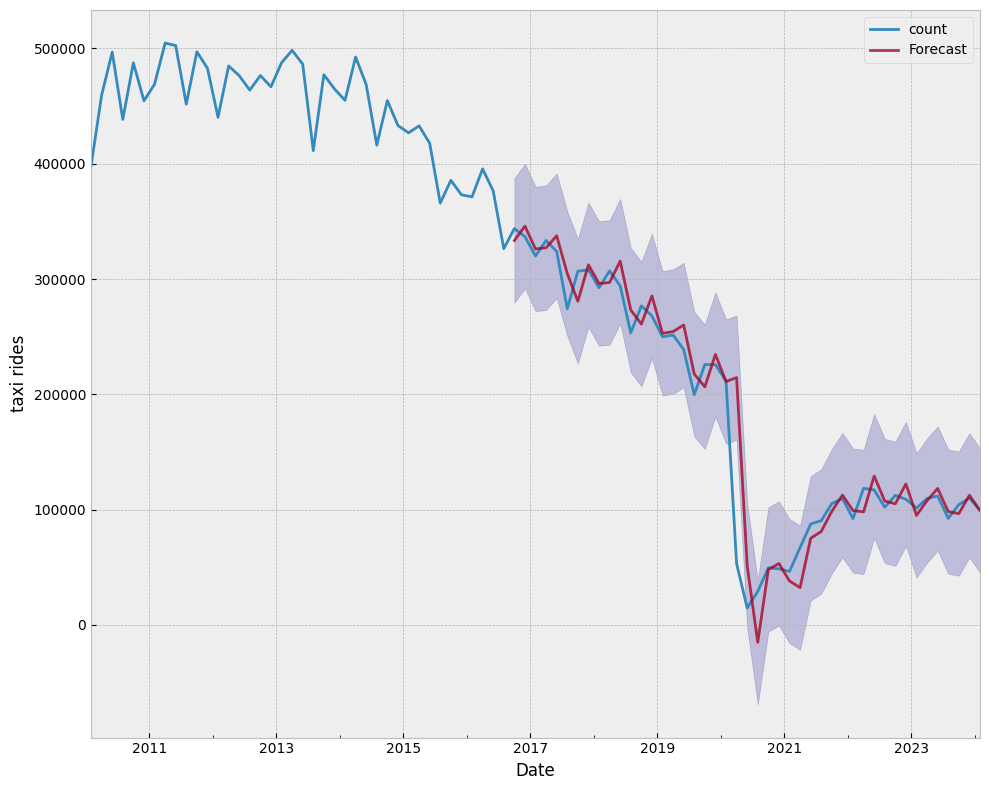

In [ ]:
pred = taxi_results.get_prediction(start=pd.to_datetime('2016-10-31'), dynamic=False)

pred_ci = pred.conf_int()
# Construct confidence interval for the fitted parameters.

# Set the figure size before plotting
plt.figure(figsize=(12, 3))

ax = y['2009':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.8)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='darkblue', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('taxi rides')
plt.legend()

# Tighten layout to minimize padding
plt.tight_layout()
plt.show()

In [ ]:
pred_ci.head()

,lower count,upper count
Date,,
2016-10-31,279389.145333,387456.885510
2016-12-31,291881.605447,399924.393719
2017-02-28,272092.654805,380120.560517
2017-04-30,273175.917449,381203.599563
2017-06-30,283557.676769,391562.465339


## Out-of-sample Prediction

<Figure size 1200x300 with 0 Axes>

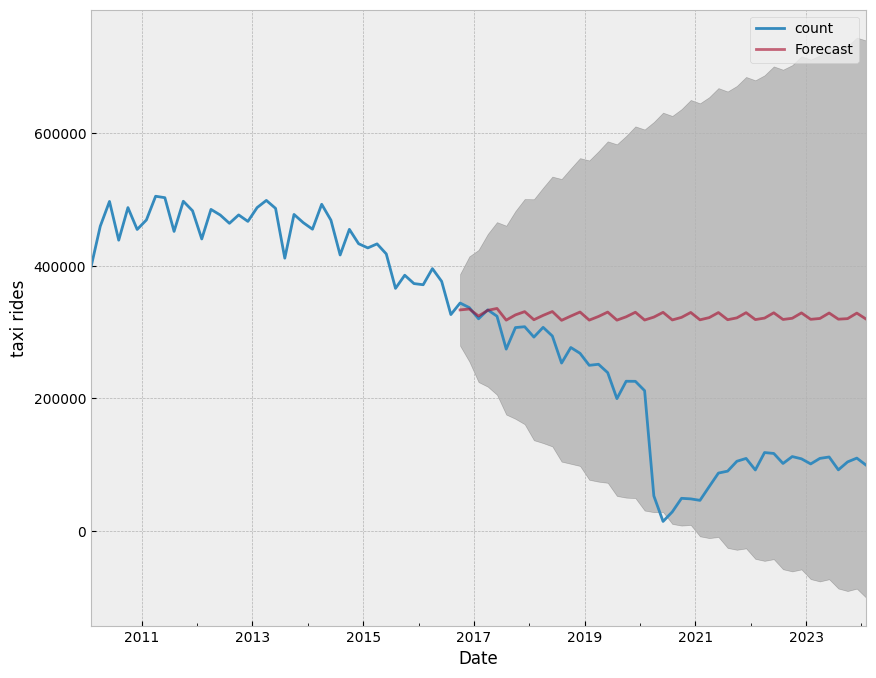

In [ ]:
pred = taxi_results.get_prediction(start=pd.to_datetime('2016-10-31'), dynamic=True)
pred_ci = pred.conf_int()
#Returns the confidence interval of the fitted parameters.

# Set the figure size before plotting
plt.figure(figsize=(12, 3))

ax = y['2009':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('taxi rides')
plt.legend()

plt.show()

# Part 2 Data Validation

Here I will take **Goldman Sach** as an example to explore how headquarter relocation may impact taxi rides.

Background information:

https://www.goldmansachs.com/our-firm/history/moments/1983-85-broad.html
85 Broad Street would serve as the firm's global headquarters until late 2009, when it began the move to a new home at 200 West Street.

https://www.goldmansachs.com/our-firm/history/moments/2005-groundbreak.html
The new headquarters officially opened for business on November 16, 2009. Groups of employees moved into the building throughout the following year, with the last people migrating to the space over the weekend of December 17, 2010.

## Data cleaning

First I will do some data cleaning.

In [ ]:
df_merge = pd.read_csv('merged_data_2009_2010.csv')

In [ ]:
df_merge.tail()

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
2274489,VTS,2010-03-17 12:54:00,2010-03-17 13:11:00,2,2.13,-73.968675,40.755032,-73.959797,40.779005,CSH,10.5,0.0,0.5,0.0,0.0,11.0
2274490,CMT,2010-04-23 01:17:17,2010-04-23 01:24:01,2,2.20,-73.989023,40.760242,-74.002875,40.733462,Cas,7.3,0.5,0.5,0.0,0.0,8.3
2274491,CMT,2010-06-16 19:33:21,2010-06-16 19:42:02,2,2.30,-74.017634,40.705015,-73.999363,40.733785,Cas,7.7,1.0,0.5,0.0,0.0,9.2
2274492,VTS,2010-06-06 07:45:00,2010-06-06 07:51:00,1,1.44,-73.976853,40.774943,-73.973218,40.791120,CAS,6.1,0.0,0.5,0.0,0.0,6.6
2274493,DDS,2010-01-24 00:13:28,2010-01-24 00:21:52,2,2.40,-73.977850,40.763552,-73.979903,40.749563,CAS,7.7,0.5,0.5,0.0,0.0,8.7


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274494 entries, 0 to 2274493
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   vendor_name            object 
 1   Trip_Pickup_DateTime   object 
 2   Trip_Dropoff_DateTime  object 
 3   Passenger_Count        int64  
 4   Trip_Distance          float64
 5   Start_Lon              float64
 6   Start_Lat              float64
 7   End_Lon                float64
 8   End_Lat                float64
 9   Payment_Type           object 
 10  Fare_Amt               float64
 11  surcharge              float64
 12  mta_tax                float64
 13  Tip_Amt                float64
 14  Tolls_Amt              float64
 15  Total_Amt              float64
dtypes: float64(11), int64(1), object(4)
memory usage: 277.6+ MB


In [ ]:
# Convert columns to datetime objects
df_merge['Trip_Pickup_DateTime'] = pd.to_datetime(df_merge['Trip_Pickup_DateTime'])
df_merge['Trip_Dropoff_DateTime'] = pd.to_datetime(df_merge['Trip_Dropoff_DateTime'])

# Calculate time difference
time_difference = df_merge['Trip_Dropoff_DateTime'] - df_merge['Trip_Pickup_DateTime']

# Filter rows based on conditions
filtered_df = df_merge[(time_difference <= pd.Timedelta(days=1)) & (time_difference >= pd.Timedelta(minutes=1))]

filtered_df.reset_index(drop=True, inplace=True)

filtered_df

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,DDS,2009-12-24 23:03:26,2009-12-24 23:09:52,2,0.40,-73.923597,40.764388,-73.921488,40.760083,CASH,3.7,0.5,NaN,0.0,0.0,4.7
1,CMT,2009-12-02 10:11:41,2009-12-02 10:32:39,2,2.60,-73.983690,40.744780,-74.008101,40.711971,Cash,12.5,0.0,0.5,0.0,0.0,13.0
2,VTS,2009-10-18 04:17:00,2009-10-18 04:38:00,5,6.08,-73.990267,40.689038,-73.962625,40.758923,CASH,17.3,0.5,NaN,0.0,0.0,17.8
3,VTS,2009-10-29 06:46:00,2009-10-29 07:00:00,1,3.72,-73.994460,40.719233,-73.980423,40.761632,Credit,11.7,0.0,NaN,2.0,0.0,13.7
4,CMT,2009-11-16 16:22:53,2009-11-16 16:28:07,1,1.70,-74.010317,40.720424,-74.007537,40.743017,Cash,6.5,1.0,0.5,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261338,VTS,2010-03-17 12:54:00,2010-03-17 13:11:00,2,2.13,-73.968675,40.755032,-73.959797,40.779005,CSH,10.5,0.0,0.5,0.0,0.0,11.0
2261339,CMT,2010-04-23 01:17:17,2010-04-23 01:24:01,2,2.20,-73.989023,40.760242,-74.002875,40.733462,Cas,7.3,0.5,0.5,0.0,0.0,8.3
2261340,CMT,2010-06-16 19:33:21,2010-06-16 19:42:02,2,2.30,-74.017634,40.705015,-73.999363,40.733785,Cas,7.7,1.0,0.5,0.0,0.0,9.2
2261341,VTS,2010-06-06 07:45:00,2010-06-06 07:51:00,1,1.44,-73.976853,40.774943,-73.973218,40.791120,CAS,6.1,0.0,0.5,0.0,0.0,6.6


## Validation

Location coordiante:

85 Broad St. (40.70423367264053, -74.01082508958224)

200 West St. (40.71493372725436, -74.01448073261324)

Here I write a function to extract points which are within 100 meters of headquarter of Goldman Sach.

In [ ]:
import pandas as pd
import math

# Haversine formula to calculate the distance between two coordinates
def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # Radius of the Earth in meters
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2.0) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

# Function to check if a coordinate is within 100 meters of a reference point
def is_within_100m(row, ref_lat, ref_lon):
    return haversine(ref_lat, ref_lon, row['End_Lat'], row['End_Lon']) <= 100

In [ ]:
df_pos = filtered_df[['Trip_Dropoff_DateTime','End_Lat','End_Lon']]

# Predefined reference coordinate
ref_lat_old, ref_lon_old = 40.70423367264053, -74.01082508958224
ref_lat_new, ref_lon_new = 40.71493372725436, -74.01448073261324

# Apply the filtering function to the DataFrame
df_filtered_new = df_pos[df_pos[['End_Lat','End_Lon']].apply(is_within_100m, axis=1, ref_lat=ref_lat_new, ref_lon=ref_lon_new)]
df_filtered_old = df_pos[df_pos[['End_Lat','End_Lon']].apply(is_within_100m, axis=1, ref_lat=ref_lat_old, ref_lon=ref_lon_old)]

In [ ]:
df_filtered_new

,Trip_Dropoff_DateTime,End_Lat,End_Lon
1721,2009-11-24 07:22:00,40.714608,-74.015472
5800,2009-12-13 06:57:57,40.714942,-74.013792
5990,2009-10-04 14:51:30,40.714352,-74.014561
11179,2009-12-05 22:11:26,40.715363,-74.014171
12877,2009-10-06 08:29:00,40.715230,-74.015347
...,...,...,...
2259455,2010-06-25 09:52:50,40.714961,-74.014181
2259654,2010-05-26 07:20:35,40.715229,-74.013523
2259663,2010-06-22 05:56:42,40.714659,-74.013876
2260569,2010-11-11 06:30:25,40.714785,-74.013673


In [ ]:
df_filtered_old

,Trip_Dropoff_DateTime,End_Lat,End_Lon
2136,2009-09-07 19:14:00,40.704262,-74.011502
3340,2009-09-15 22:53:31,40.704226,-74.011247
4452,2009-09-24 10:05:16,40.704836,-74.009954
6966,2009-09-20 17:29:39,40.704354,-74.010956
9807,2009-09-22 13:53:00,40.703930,-74.011575
...,...,...,...
2253047,2010-12-24 16:49:49,40.703981,-74.011086
2255524,2010-08-03 14:49:00,40.704300,-74.010198
2255783,2010-10-20 01:33:58,40.703970,-74.010379
2259523,2010-11-22 01:50:00,40.704052,-74.010832


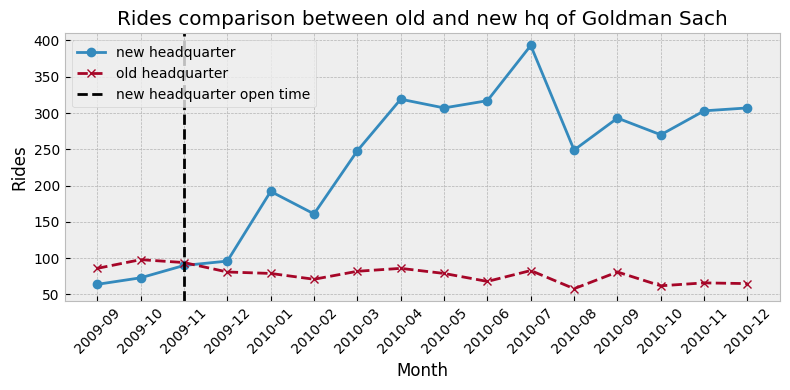

In [ ]:
df1 = df_filtered_new
df2 = df_filtered_old

# Convert the first column to datetime
df1['Year_Month'] = pd.to_datetime(df1['Trip_Dropoff_DateTime']).dt.to_period('M')
df2['Year_Month'] = pd.to_datetime(df2['Trip_Dropoff_DateTime']).dt.to_period('M')

# Group by the extracted year and month and count the occurrences
df1_grouped = df1.groupby('Year_Month').size()
df2_grouped = df2.groupby('Year_Month').size()

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(df1_grouped.index.astype(str), df1_grouped.values, marker='o', linestyle='-', label='new headquarter')
plt.plot(df2_grouped.index.astype(str), df2_grouped.values, marker='x', linestyle='--', label='old headquarter')

# Add vertical reference line at '2009-11'
plt.axvline(x='2009-11', color='black', linestyle='--', label='new headquarter open time')

plt.xlabel('Month')
plt.ylabel('Rides')
plt.title('Rides comparison between old and new hq of Goldman Sach')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

It seems the data is of high quality!

# Part 3 Regression analysis about taxi rides within FOMC meeting window

In [ ]:
df_fomc = pd.read_csv('merged_data_2009_2010.csv')
df_fomc.head()

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,DDS,2009-12-24 23:03:26,2009-12-24 23:09:52,2,0.40,-73.923597,40.764388,-73.921488,40.760083,CASH,3.7,0.5,NaN,0.0,0.0,4.7
1,CMT,2009-12-02 10:11:41,2009-12-02 10:32:39,2,2.60,-73.983690,40.744780,-74.008101,40.711971,Cash,12.5,0.0,0.5,0.0,0.0,13.0
2,VTS,2009-10-18 04:17:00,2009-10-18 04:38:00,5,6.08,-73.990267,40.689038,-73.962625,40.758923,CASH,17.3,0.5,NaN,0.0,0.0,17.8
3,VTS,2009-10-29 06:46:00,2009-10-29 07:00:00,1,3.72,-73.994460,40.719233,-73.980423,40.761632,Credit,11.7,0.0,NaN,2.0,0.0,13.7
4,CMT,2009-11-16 16:22:53,2009-11-16 16:28:07,1,1.70,-74.010317,40.720424,-74.007537,40.743017,Cash,6.5,1.0,0.5,0.0,0.0,8.0


In part 1, I only used number of rides in the data after prepossessing to explore time series statistical modeling. In this part, I will dig into another interesting topic - digging hidden information between different factors, such as taxi ride and FOMC activity. **I will study the relationship of taxi rides between main commercial banks and Federal Reserve Bank of New York during FOMC meeting.**

Location coordiante of some main commercial banks:

Chase (40.755892910564405, -73.97558475061152)

BOA (40.75561808902621, -73.98493616434797)

Citi (40.75890558644017, -73.97138893963235)



FRBNY (40.70837291231589, -74.00864881451562)

In [ ]:
# List of four reference coordinates (replace these with actual values)
reference_coordinates = [
    (40.755892910564405, -73.97558475061152),
    (40.75561808902621, -73.98493616434797),
    (40.75890558644017, -73.97138893963235),
    (40.70837291231589, -74.00864881451562)
]

def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # Radius of the Earth in meters
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0) ** 2 + \
        np.cos(phi1) * np.cos(phi2) * \
        np.sin(delta_lambda / 2.0) ** 2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # Output distance in meters

def filter_by_proximity(df, coordinates, max_distance=100):
    mask = np.zeros(len(df), dtype=bool)

    for coord in coordinates:
        lat, lon = coord
        pickup_distances = haversine(df['Start_Lat'].values, df['Start_Lon'].values, lat, lon)
        drop_distances = haversine(df['End_Lat'].values, df['End_Lon'].values, lat, lon)

        # mask |= (pickup_distances <= max_distance) | (drop_distances <= max_distance)
        mask |= drop_distances <= max_distance
    return df[mask]



filtered_df = filter_by_proximity(df_fomc, reference_coordinates)

In [ ]:
filtered_df

FOMC time table:

https://www.federalreserve.gov/monetarypolicy/fomchistorical2009.htm

https://www.federalreserve.gov/monetarypolicy/fomchistorical2010.htm

In [ ]:
filtered_df['Trip_Pickup_DateTime'] = pd.to_datetime(filtered_df['Trip_Pickup_DateTime'])

# Define the list of specific dates
specific_dates = [
    'September 22, 2009', 'September 23, 2009',
    'November 3, 2009', 'November 4, 2009',
    'December 15, 2009', 'December 16, 2009',
    'January 26, 2010', 'January 27, 2010',
    'March 16, 2010',
    'April 27, 2010', 'April 28, 2010',
    'June 22, 2010', 'June 23, 2010',
    'August 10, 2010',
    'September 21, 2010',
    'November 2, 2010', 'November 3, 2010',
    'December 14, 2010', 'December 15, 2010'
]

# Convert specific dates to datetime objects
specific_dates = pd.to_datetime(specific_dates, format='%B %d, %Y')

# Create a new column 'FOMC' with 1 if the Trip_Pickup_DateTime falls in specific_dates else 0
filtered_df['FOMC'] = filtered_df['Trip_Pickup_DateTime'].dt.floor('D').isin(specific_dates).astype(int)

# Display the resulting dataframe
print(filtered_df)

        vendor_name Trip_Pickup_DateTime Trip_Dropoff_DateTime  \
110             VTS  2009-11-04 15:40:00   2009-11-04 16:00:00   
153             VTS  2009-11-11 09:34:00   2009-11-11 09:49:00   
480             VTS  2009-09-01 11:16:00   2009-09-01 11:22:00   
484             CMT  2009-10-17 11:51:58   2009-10-17 11:56:20   
639             DDS  2009-09-11 08:55:14   2009-09-11 09:25:29   
...             ...                  ...                   ...   
2273344         CMT  2010-04-08 07:04:22   2010-04-08 07:12:08   
2273679         VTS  2010-08-25 13:08:00   2010-08-25 13:41:00   
2273922         CMT  2010-06-30 00:25:26   2010-06-30 00:41:56   
2273943         CMT  2010-08-06 08:25:41   2010-08-06 08:36:24   
2274481         CMT  2010-04-27 06:07:01   2010-04-27 06:10:58   

         Passenger_Count  Trip_Distance  Start_Lon  Start_Lat    End_Lon  \
110                    5           2.87 -73.988727  40.722067 -73.974937   
153                    1           2.02 -73.985945  40.

In [ ]:
filtered_df['FOMC'].value_counts()

FOMC
0    16102
1      808
Name: count, dtype: int64

## Hypothesis and Poisson regression

I hypothesize that there is a correlation between cab ride demand and FOMC during a certain time window.

In [ ]:
# Extract month and weekday from Trip_Pickup_DateTime
filtered_df['Month'] = filtered_df['Trip_Pickup_DateTime'].dt.month
filtered_df['Weekday'] = filtered_df['Trip_Pickup_DateTime'].dt.weekday

# Drop all other columns except for Month, Weekday, FOMC, and Passenger_Count
filtered_df = filtered_df[['Month', 'Weekday', 'FOMC', 'Passenger_Count']]

# Display the resulting dataframe
print(filtered_df)


         Month  Weekday  FOMC  Passenger_Count
110         11        2     1                5
153         11        2     0                1
480          9        1     0                5
484         10        5     0                1
639          9        4     0                1
...        ...      ...   ...              ...
2273344      4        3     0                1
2273679      8        2     0                1
2273922      6        2     0                1
2273943      8        4     0                1
2274481      4        1     1                1

[16910 rows x 4 columns]


In [ ]:
import statsmodels.api as sm

# Fit Poisson regression model
poisson_model = sm.GLM(filtered_df['Passenger_Count'],
                       filtered_df[['Month', 'Weekday', 'FOMC']],
                       family=sm.families.Poisson()).fit()

# Display model summary
print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:        Passenger_Count   No. Observations:                16910
Model:                            GLM   Df Residuals:                    16907
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25481.
Date:                Thu, 23 May 2024   Deviance:                       12393.
Time:                        02:18:17   Pearson chi2:                 1.72e+04
No. Iterations:                     5   Pseudo R-squ. (CS):           -0.02141
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Month          0.0351      0.001     30.378      0.0

The result is significant. Great!